In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Neighborhood: South End, Decreasing Trend: 2198.0
Neighborhood: Hyde Park, Decreasing Trend: 946.0
Neighborhood: Mattapan, Decreasing Trend: 869.0
Neighborhood: Roxbury, Decreasing Trend: 660.0
Neighborhood: Jamaica Plain, Decreasing Trend: 658.0
Neighborhood: South Boston, Decreasing Trend: 194.0


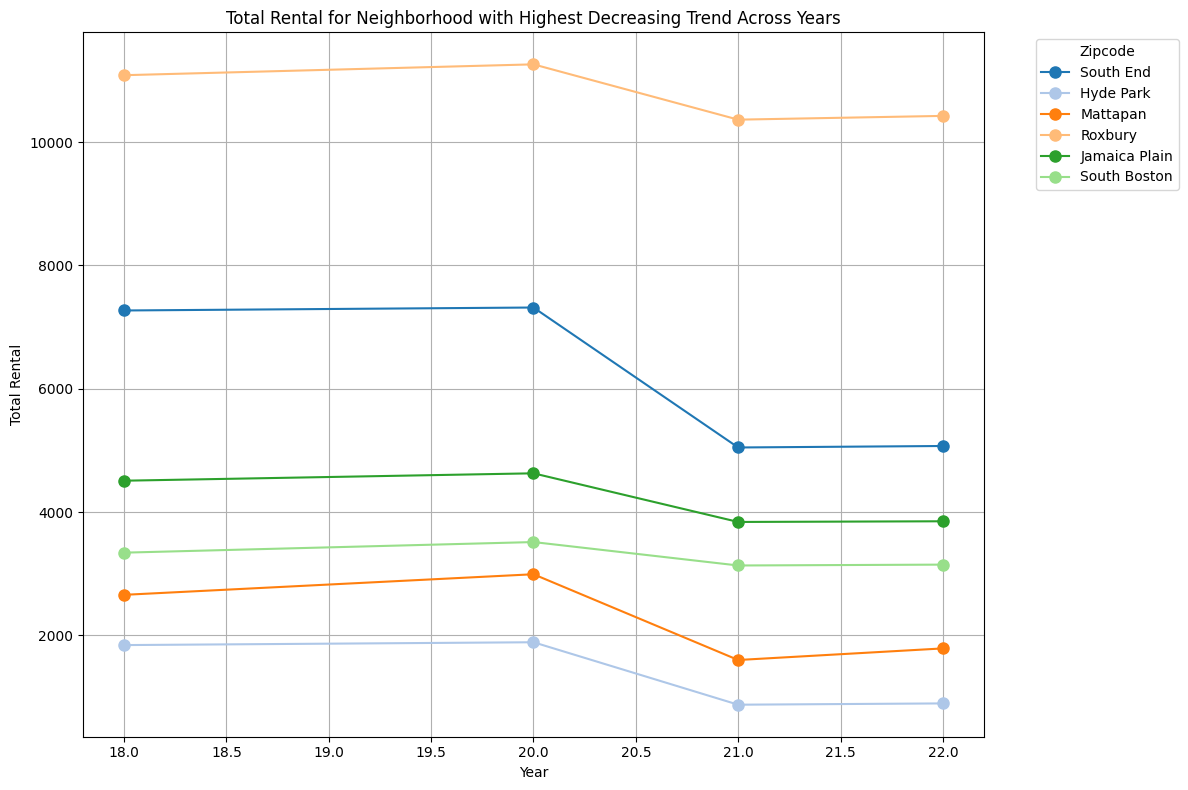

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def process_file(filename):
    data = pd.read_csv(filename)
    
    # Rename the column to 'Income_restricted_rental' if it exists
    for col in data.columns:
        if 'Income' in col and 'Rental' in col:
            data.rename(columns={col: 'Income_restricted_rental'}, inplace=True)
            break  # Stop searching for other variations once the column is renamed
    
    # Convert 'Income_restricted_rental' column to numeric, coerce errors to NaN
    data['Income_restricted_rental'] = pd.to_numeric(data['Income_restricted_rental'], errors='coerce')
    
    # Drop rows with NaN values in 'Income_restricted_rental' column
    data = data.dropna(subset=['Income_restricted_rental'])
    
    unique_zipcodes = data['Neighborhood'].unique()
    
    zipcode_total_rental = {}
    
    for zipcode in unique_zipcodes:
        total_rental = data[data['Neighborhood'] == zipcode]['Income_restricted_rental'].sum()
        zipcode_total_rental[zipcode] = total_rental
    
    return zipcode_total_rental

all_zipcode_total_rental = {}

for year in [18, 20, 21, 22]:
    filename = f'20{year:d}.csv'
    total_rental = process_file(filename)
    all_zipcode_total_rental[year] = total_rental

common_zipcodes = set.intersection(*[set(all_zipcode_total_rental[year].keys()) for year in [18, 20, 21, 22]])

# Calculate the trend for each zipcode
zipcode_trends = {}
for zipcode in common_zipcodes:
    total_rentals = [all_zipcode_total_rental[year].get(zipcode, 0) for year in [18, 20, 21, 22]]
    trend = total_rentals[0] - total_rentals[-1]  # Change in total rental from 2018 to 2022 (decreasing trend)
    zipcode_trends[zipcode] = trend

# Sort zipcodes based on decreasing trend and get top 10
top_10_zipcodes = sorted(zipcode_trends, key=zipcode_trends.get, reverse=True)[:6]

# Print the top 10 zipcodes with the highest decreasing trend
for zipcode in top_10_zipcodes:
    print(f"Neighborhood: {zipcode}, Decreasing Trend: {zipcode_trends[zipcode]}")

# Plotting
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20.colors
color_index = 0
for zipcode in top_10_zipcodes:
    total_rentals = [all_zipcode_total_rental[year].get(zipcode, 0) for year in [18, 20, 21, 22]]
    plt.plot([18, 20, 21, 22], total_rentals, marker='o', label=zipcode, markersize=8, color=colors[color_index])
    color_index = (color_index + 1) % len(colors)
plt.xlabel('Year')
plt.ylabel('Total Rental')
plt.title('Total Rental for Neighborhood with Highest Decreasing Trend Across Years')
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
hv = pd.read_csv('HomeValue.csv')

In [5]:
hv = hv[(hv['City'] == 'Boston')]

In [8]:
hv.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
39,275424,39,South Dorchester,neighborhood,MA,MA,Boston,"Boston-Cambridge-Newton, MA-NH",Suffolk County,134838.139589,...,604715.601273,607980.977707,611235.769960,612922.969545,613748.992359,613382.256097,613704.064179,614916.894097,617534.474243,622462.861659
192,54232,196,Roxbury,neighborhood,MA,MA,Boston,"Boston-Cambridge-Newton, MA-NH",Suffolk County,124584.928728,...,582369.686223,584943.465164,587200.113529,587309.232026,586642.713181,585342.019685,586007.466316,589477.933192,594564.515053,601708.625065
203,154795,209,Jamaica Plain,neighborhood,MA,MA,Boston,"Boston-Cambridge-Newton, MA-NH",Suffolk County,212021.510380,...,742526.861721,746459.242846,749405.236692,750998.622898,750218.442660,747902.229083,745648.421527,746567.889645,749414.982528,755835.833798
206,37575,212,Brighton,neighborhood,MA,MA,Boston,"Boston-Cambridge-Newton, MA-NH",Suffolk County,156559.390429,...,566323.307544,566213.479107,566608.443259,565145.684647,562582.717979,559003.901337,557246.776423,558901.684909,562611.503269,568986.253367
235,154399,241,East Boston,neighborhood,MA,MA,Boston,"Boston-Cambridge-Newton, MA-NH",Suffolk County,118874.900041,...,614965.723727,617705.450025,619380.530933,620611.337508,620354.130080,618443.876007,617655.954343,620007.807569,625431.847556,632936.088349


In [38]:
selected_columns = hv[['RegionName']].join(hv.filter(regex='^(201[0-9]|202[0-3])-'))

In [55]:
years = [col.split('-')[0] for col in selected_columns.columns[1:]]
years = sorted(set(years))

import numpy as np

yearly_avg_data = hv[['RegionName']].copy()

for year in years:
    year_columns = [col for col in selected_columns.columns if col.startswith(year)]
    mean_values = []
    for i in range(0, len(year_columns), 12):
        chunk_mean = selected_columns[year_columns[i:i+12]].mean(axis=1)
        mean_values.append(chunk_mean)
    
    yearly_avg_data[year] = np.concatenate(mean_values, axis=0)

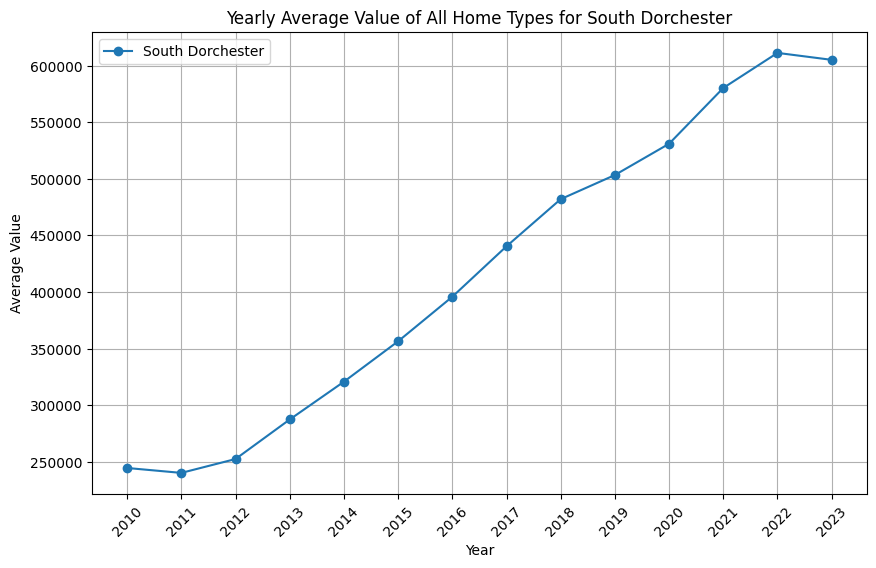

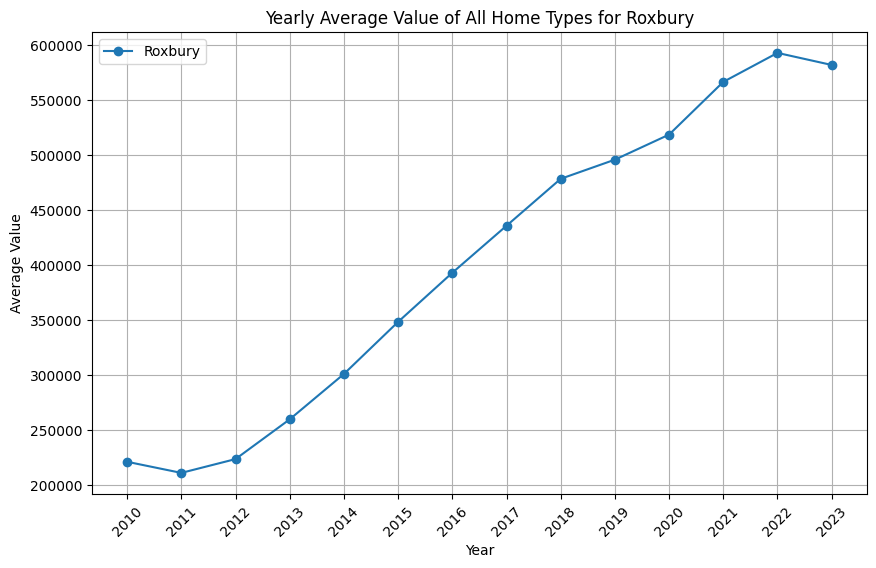

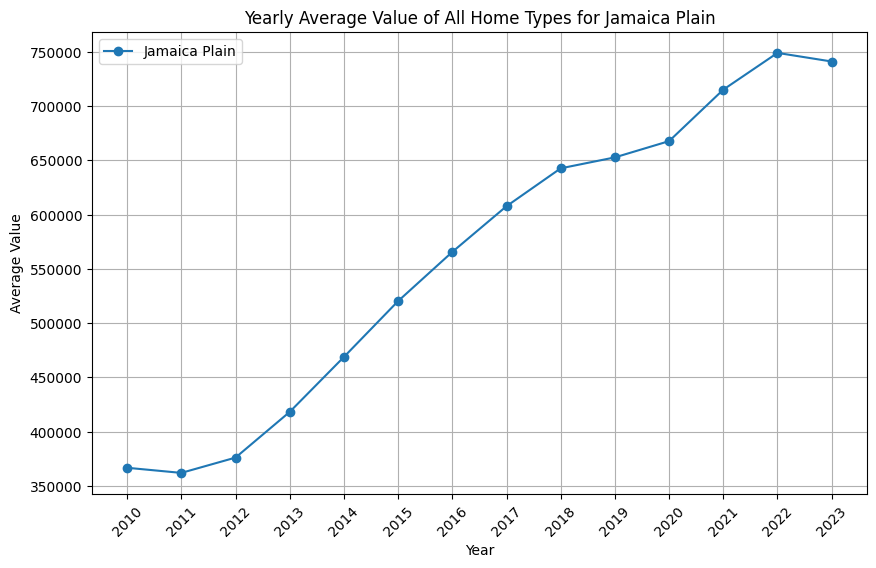

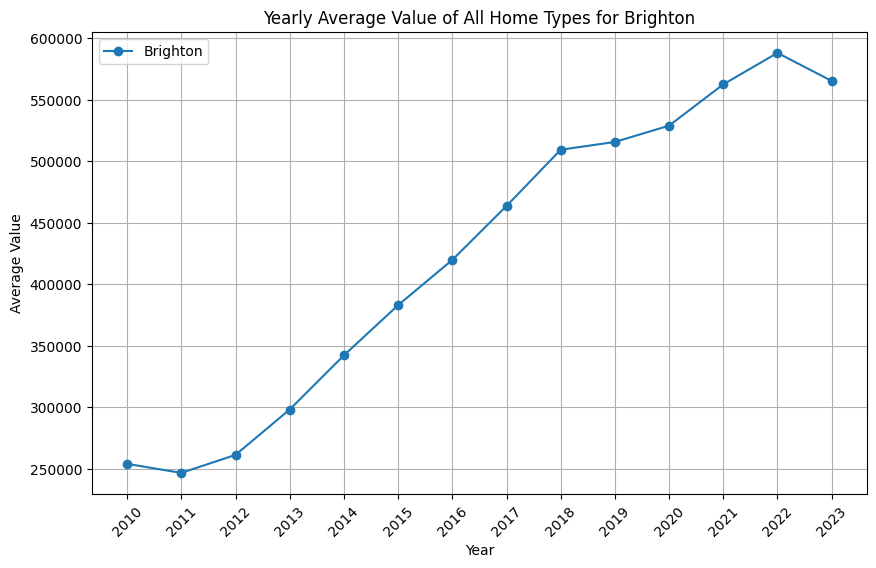

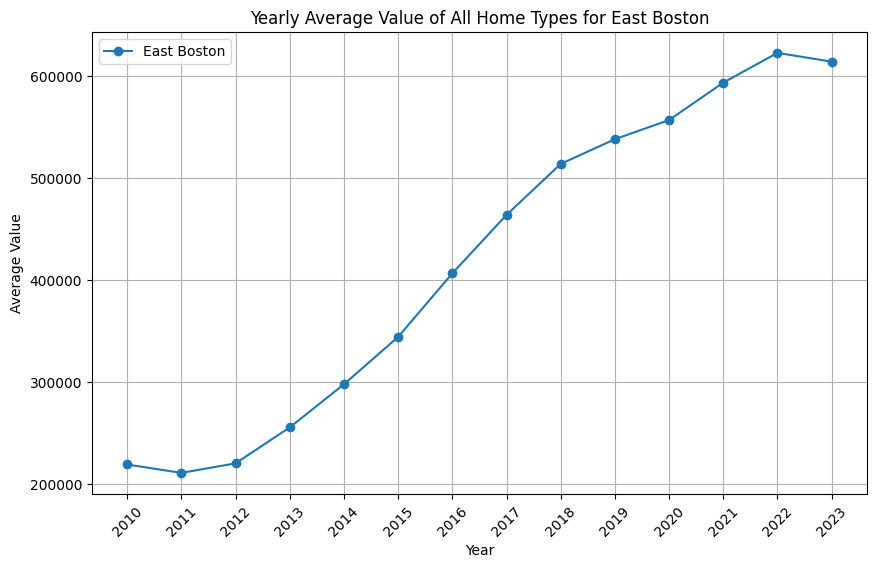

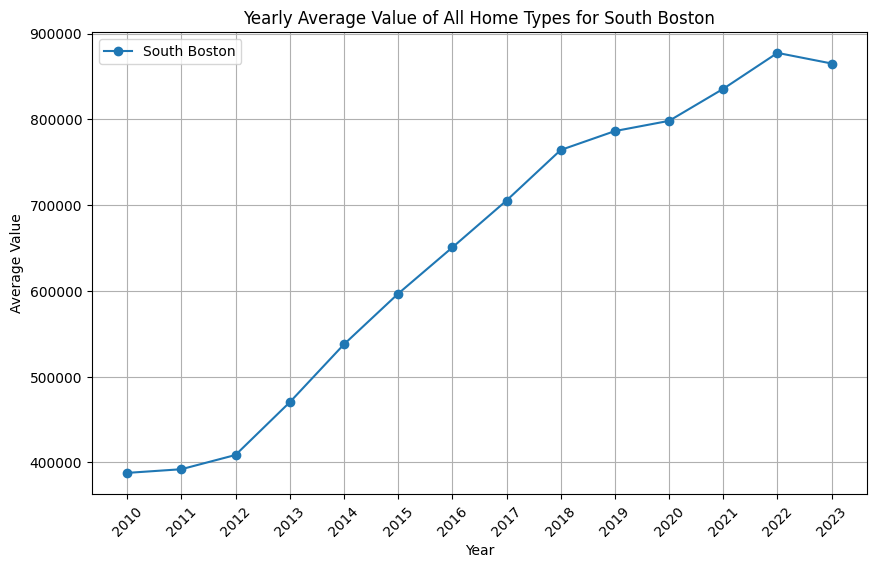

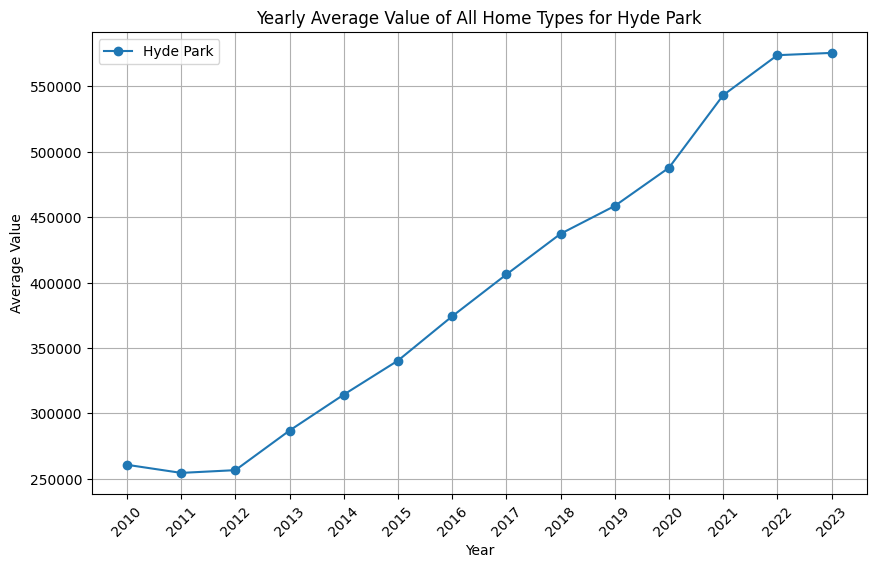

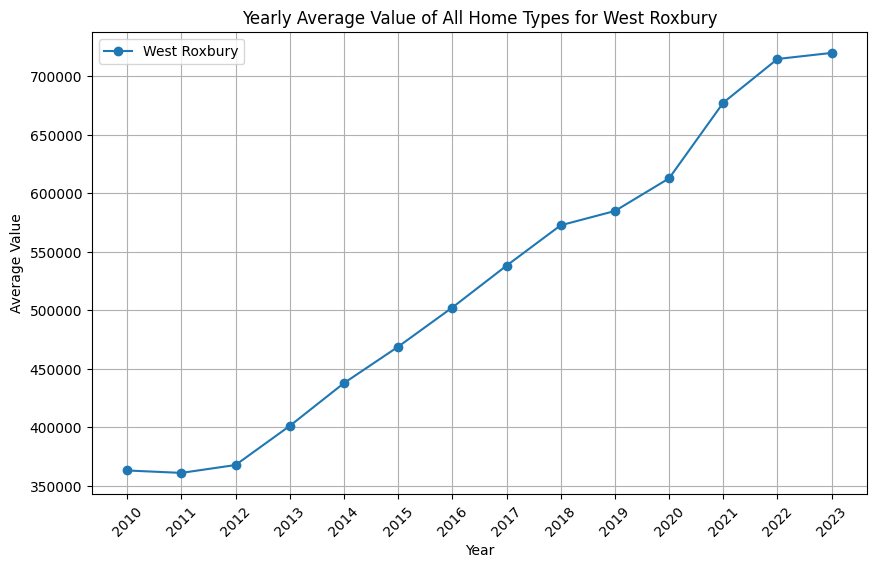

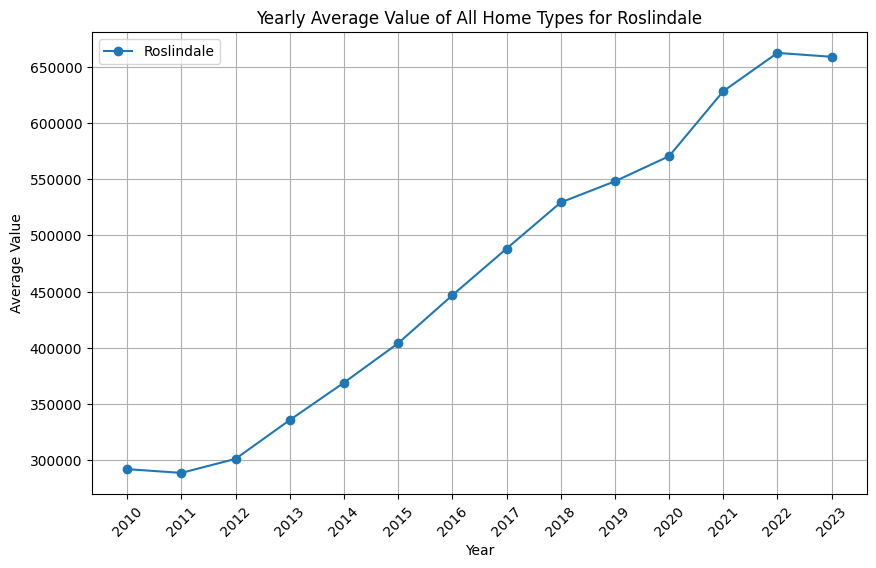

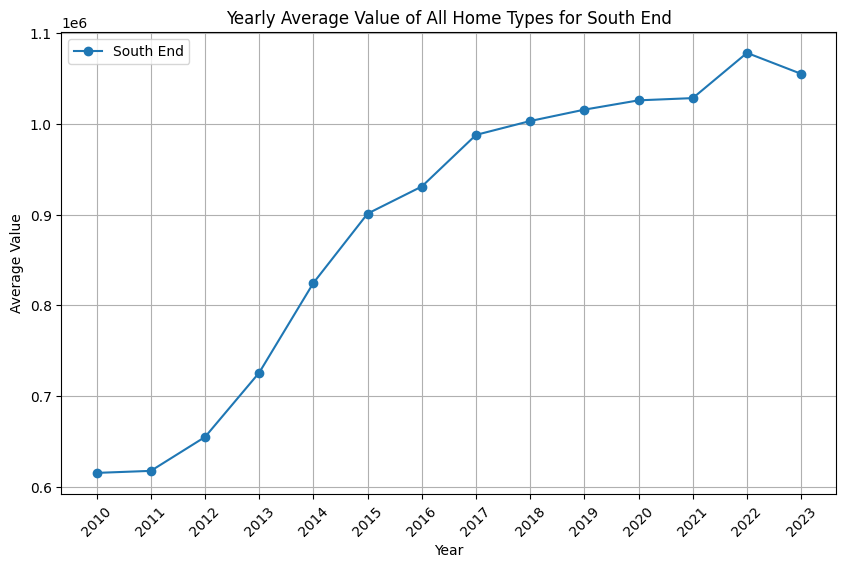

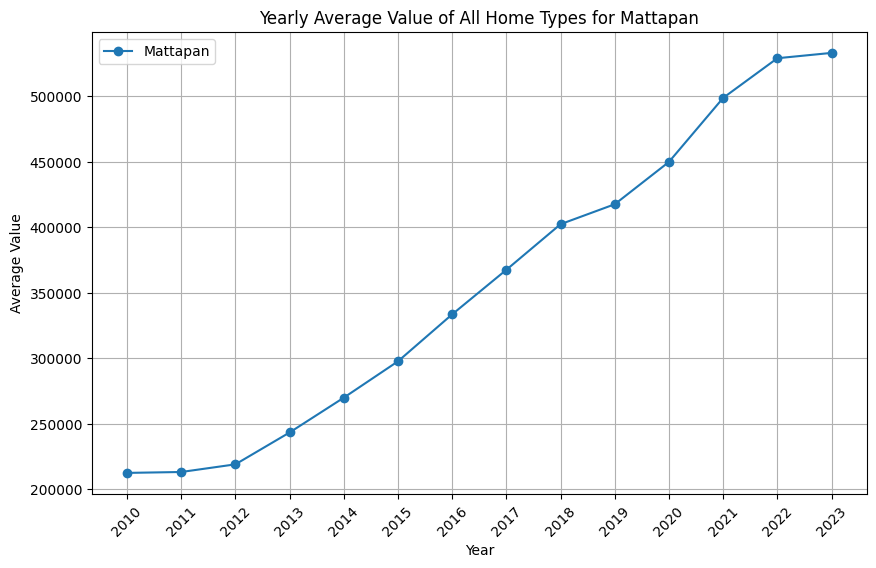

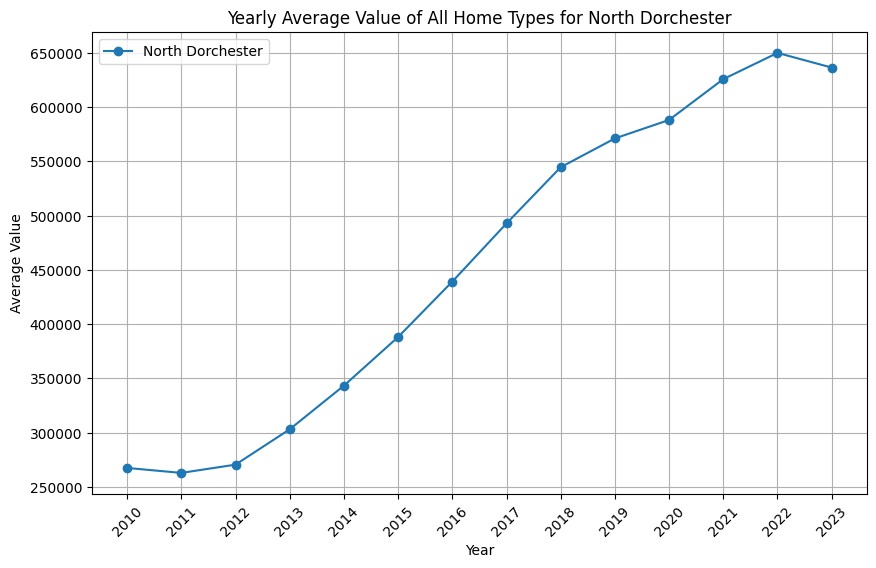

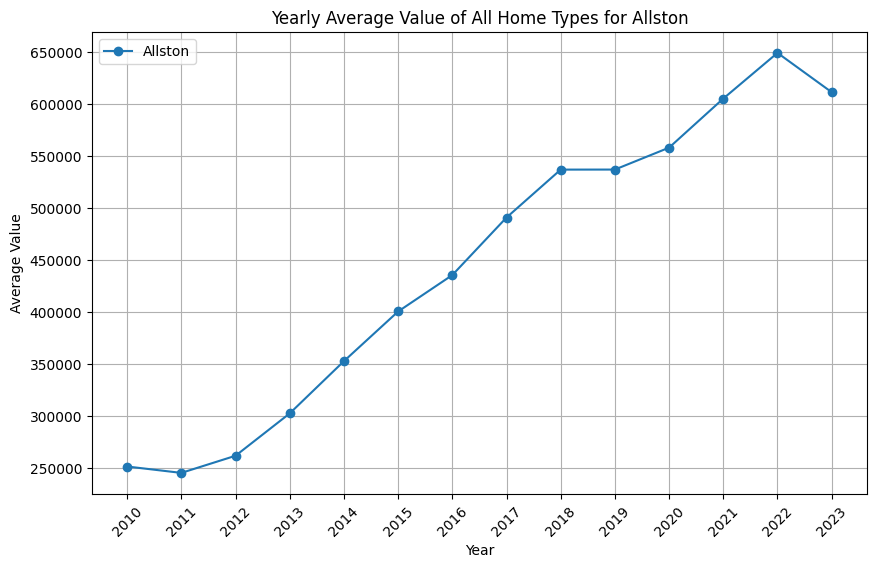

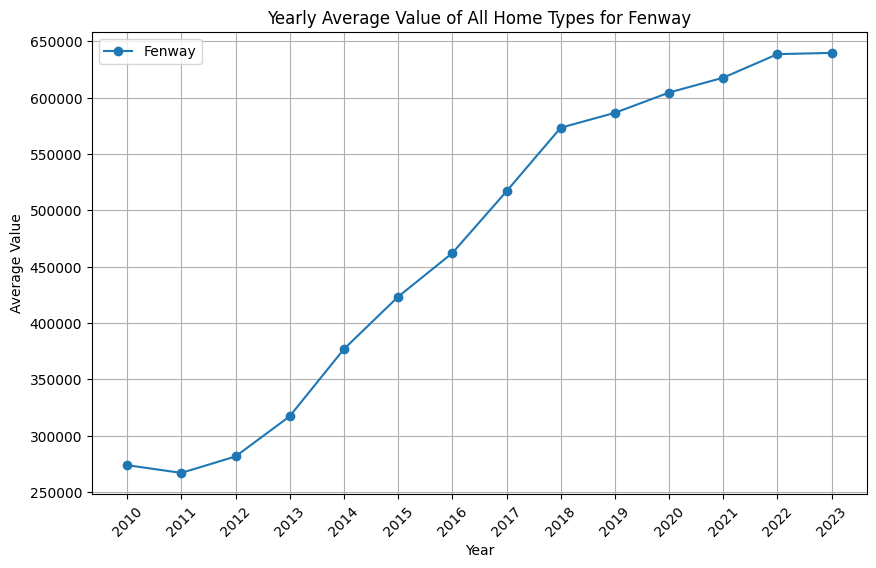

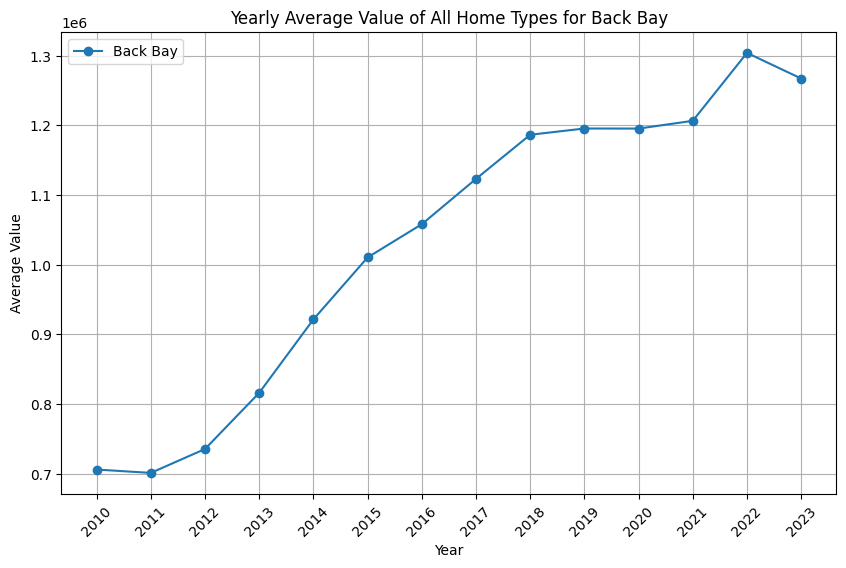

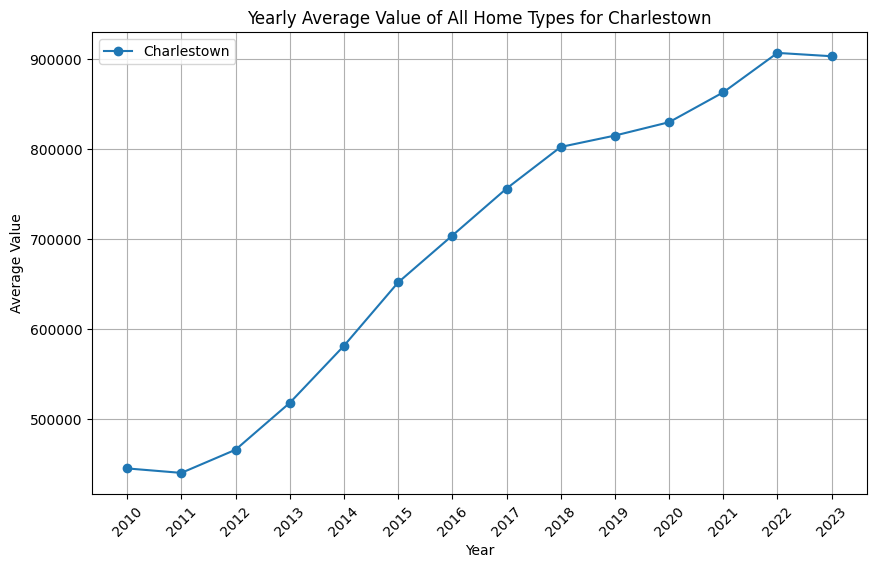

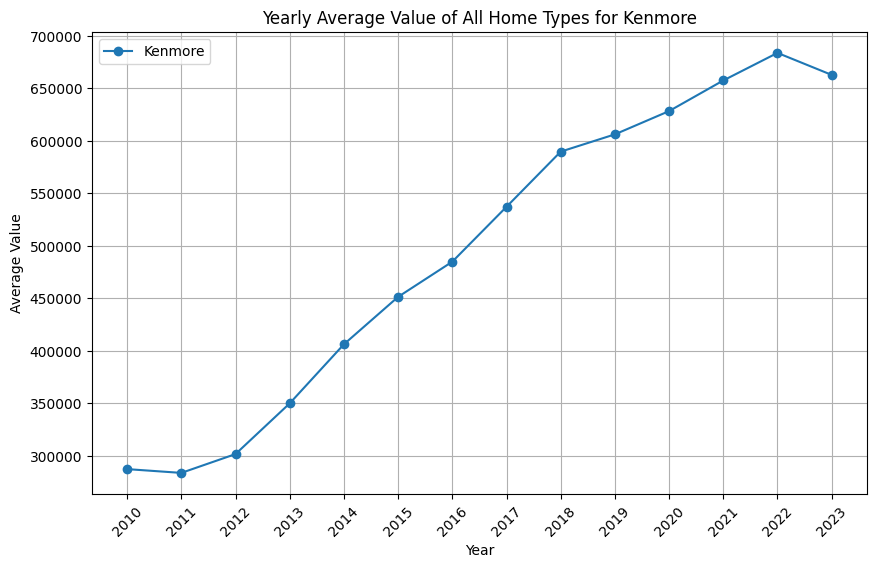

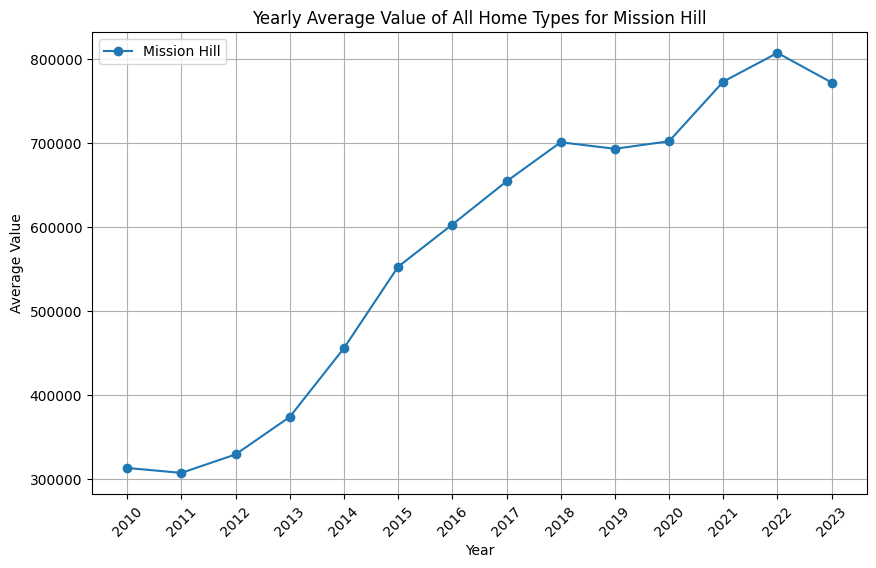

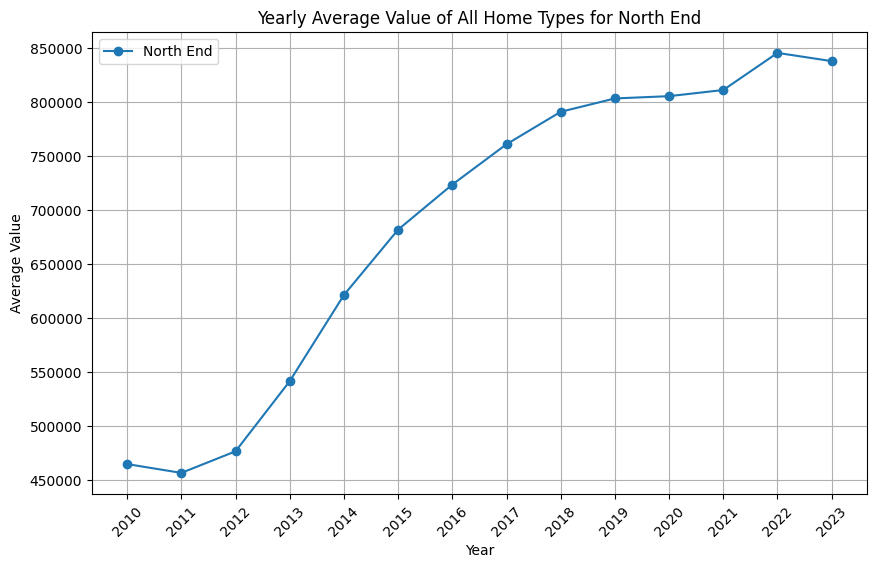

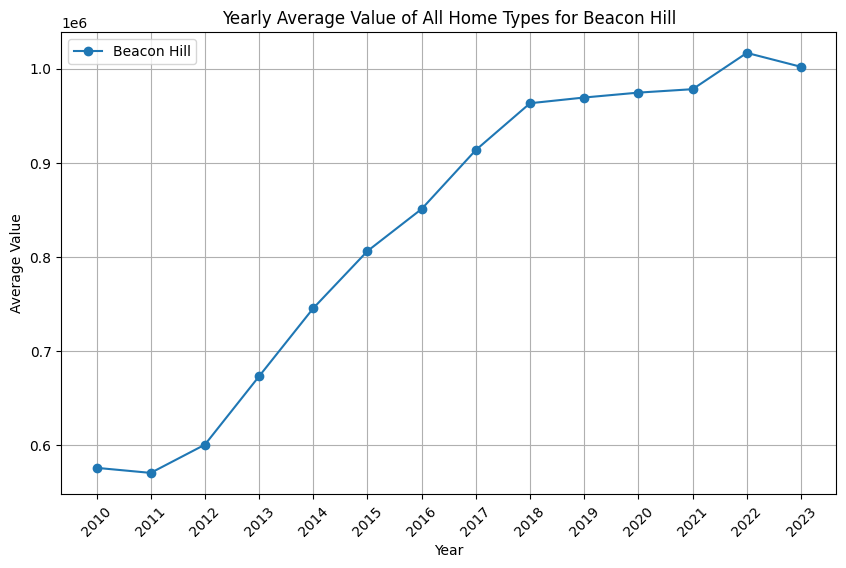

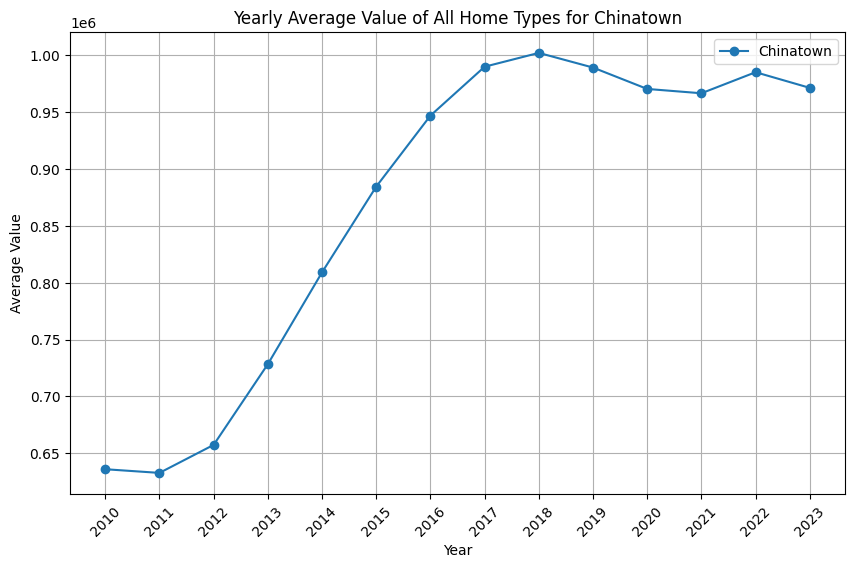

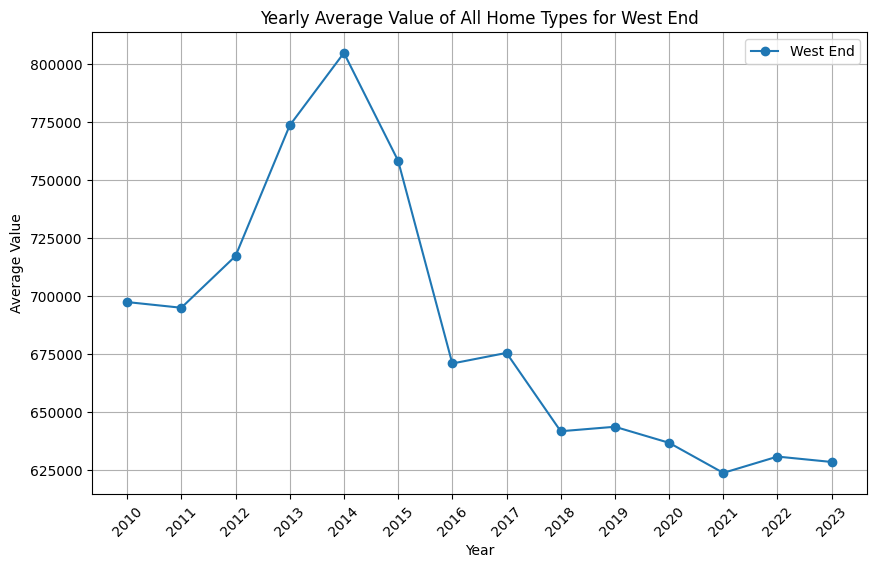

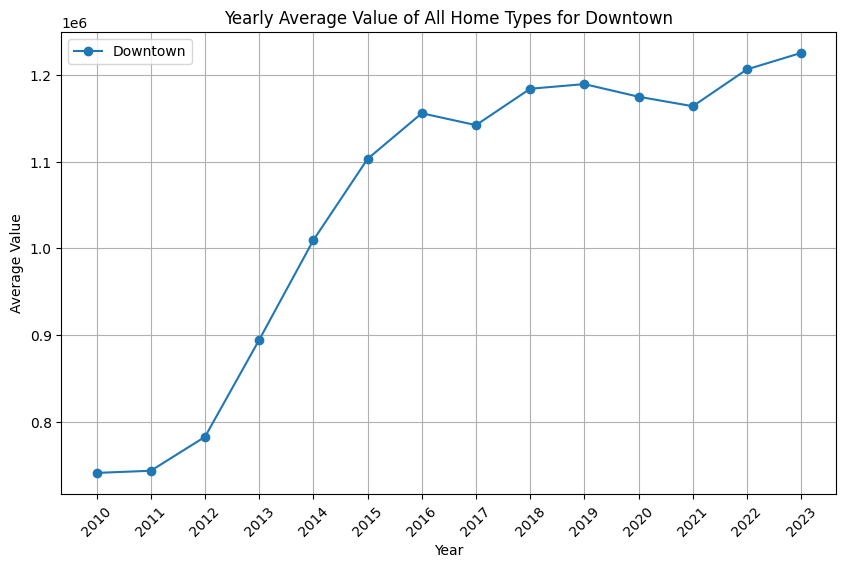

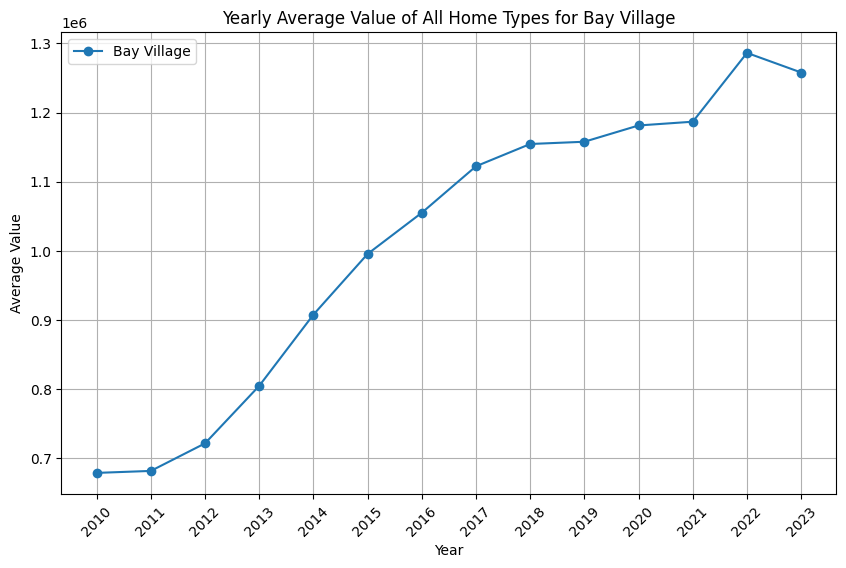

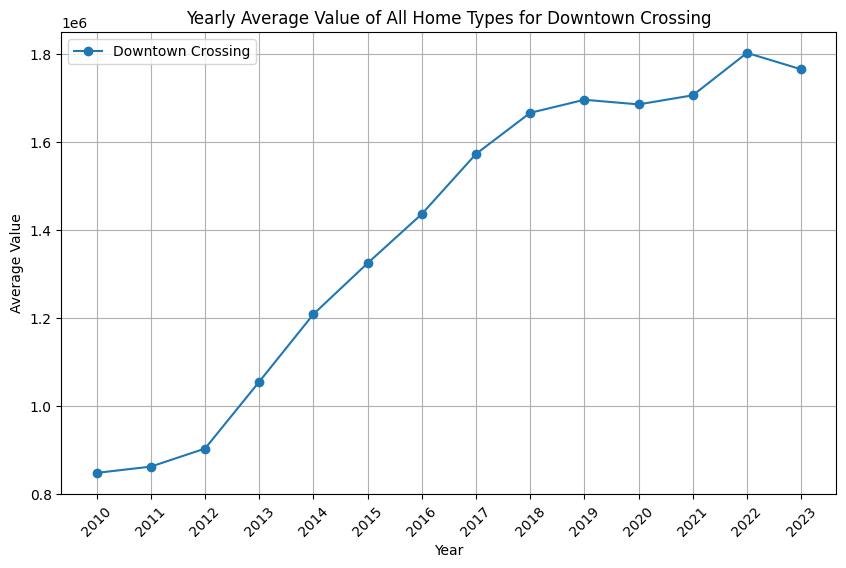

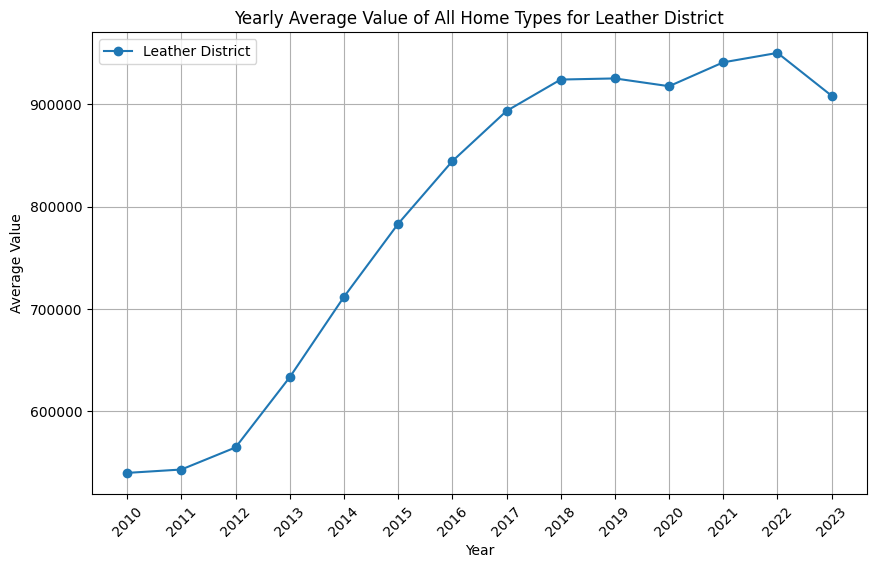

In [56]:
import matplotlib.pyplot as plt

for region in yearly_avg_data['RegionName']:
    plt.figure(figsize=(10, 6))
    plt.plot(years, yearly_avg_data.loc[yearly_avg_data['RegionName'] == region, years].values.flatten(), marker='o', label=region)
    plt.title(f'Yearly Average Value of All Home Types for {region}')
    plt.xlabel('Year')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

In [57]:
mfr = pd.read_csv('Multi_Family_Rental.csv')

In [59]:
mfr = mfr[(mfr['RegionName'] == 'Boston, MA')]

In [64]:
mfr = mfr.filter(regex='^(201[0-9]|202[0-3])-')
mfr.head()

,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
10,2050.98333,2052.658618,2063.229484,2070.89815,2078.954269,2085.896749,2091.437601,2100.628988,2106.642692,2121.461703,...,2867.505716,2881.487041,2887.992588,2893.880044,2901.221507,2907.600412,2913.93823,2927.430023,2951.094841,2979.161983


In [65]:
years = [col.split('-')[0] for col in mfr.columns[1:]]
years = sorted(set(years))

print(years)


['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [66]:
yearly_avg_data = pd.DataFrame()

for year in years:
    year_columns = [col for col in mfr.columns if col.startswith(year)]
    mean_values = []
    for i in range(0, len(year_columns), 12):
        chunk_mean = mfr[year_columns[i:i+12]].mean(axis=1)
        mean_values.append(chunk_mean)
    
    yearly_avg_data[year] = np.concatenate(mean_values, axis=0)

In [70]:
yearly_avg_data.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,2091.541101,2180.329857,2259.436823,2339.472718,2417.435622,2396.822705,2449.663933,2721.438757,2898.957505


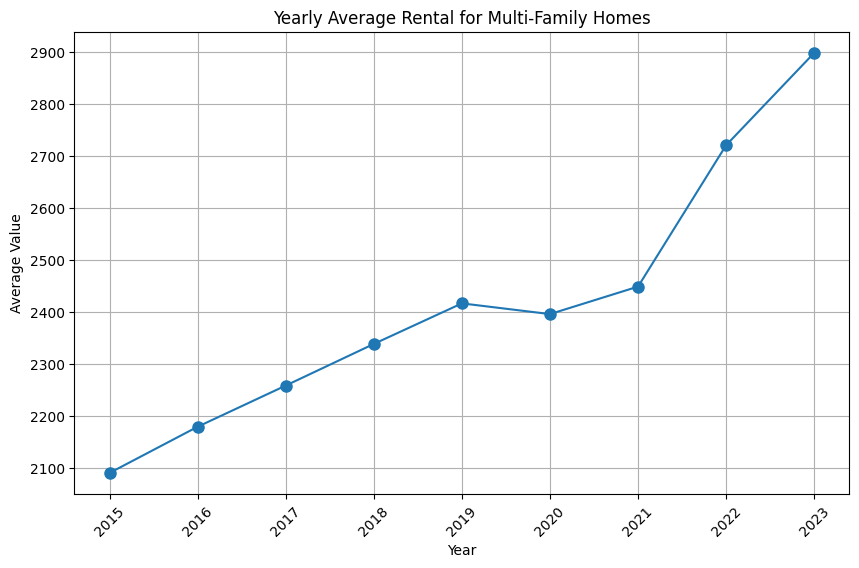

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(years, yearly_avg_data.values.flatten(), marker='o', markersize=8)
plt.title(f'Yearly Average Rental for Multi-Family Homes')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [79]:
sfr = pd.read_csv('Single_Family_Rental.csv')
sfr = sfr[(sfr['RegionName'] == 'Boston, MA')]
sfr = sfr.filter(regex='^(201[0-9]|202[0-3])-')
sfr.head()

,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
10,2292.126991,2301.844599,2314.027466,2357.987491,2360.775101,2366.650438,2374.203252,2390.125507,2399.774213,2401.969269,...,3532.378665,3584.273666,3590.965705,3607.747587,3599.082395,3615.739601,3628.426531,3638.047566,3632.377081,3650.142309


In [80]:
years = [col.split('-')[0] for col in sfr.columns[1:]]
years = sorted(set(years))

print(years)

yearly_avg_data = pd.DataFrame()

for year in years:
    year_columns = [col for col in sfr.columns if col.startswith(year)]
    mean_values = []
    for i in range(0, len(year_columns), 12):
        chunk_mean = sfr[year_columns[i:i+12]].mean(axis=1)
        mean_values.append(chunk_mean)
    
    yearly_avg_data[year] = np.concatenate(mean_values, axis=0)

print(yearly_avg_data.head())

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
          2015         2016         2017         2018         2019  \
0  2360.336546  2479.583876  2586.182102  2699.419274  2812.748085   

          2020         2021         2022         2023  
0  2900.273963  3048.739831  3323.484416  3588.195011  


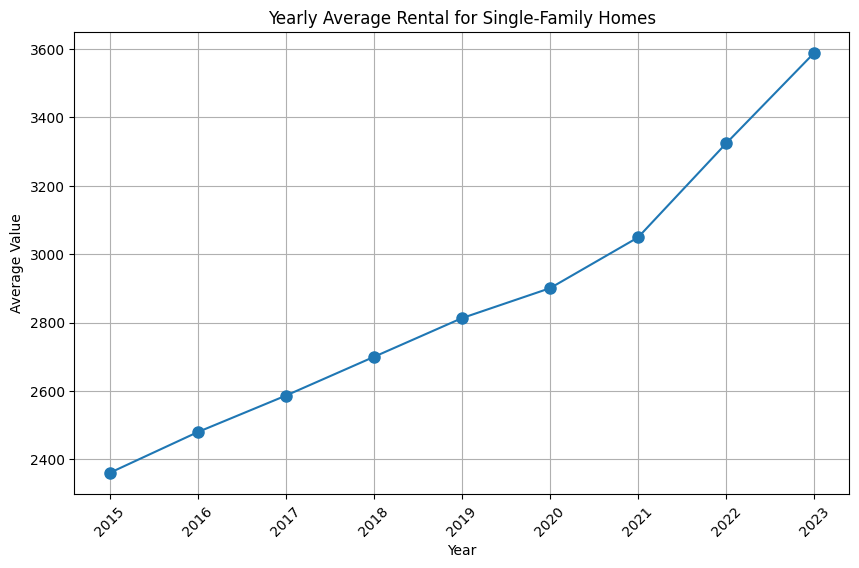

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(years, yearly_avg_data.values.flatten(), marker='o', markersize=8)
plt.title(f'Yearly Average Rental for Single-Family Homes')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

['2018', '2019', '2020', '2021', '2022', '2023']
         2018    2019        2020        2021    2022   2023
0  190.166667  169.25  190.416667  163.833333  134.75  132.0


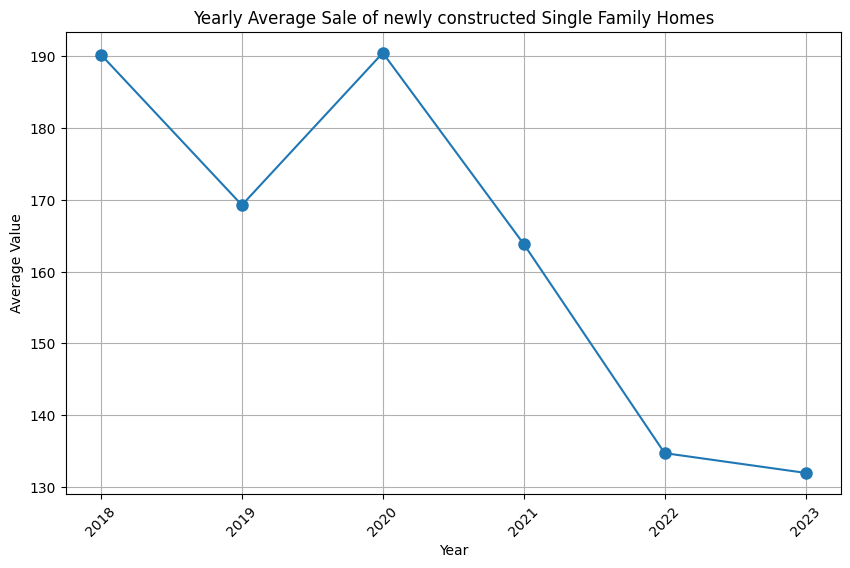

In [85]:
sfnc = pd.read_csv('New_Construction_Single.csv')
sfnc = sfnc[(sfnc['RegionName'] == 'Boston, MA')]
sfnc = sfnc.filter(regex='^(201[0-9]|202[0-3])-')
years = [col.split('-')[0] for col in sfnc.columns[1:]]
years = sorted(set(years))

print(years)

yearly_avg_data = pd.DataFrame()

for year in years:
    year_columns = [col for col in sfnc.columns if col.startswith(year)]
    mean_values = []
    for i in range(0, len(year_columns), 12):
        chunk_mean = sfnc[year_columns[i:i+12]].mean(axis=1)
        mean_values.append(chunk_mean)
    
    yearly_avg_data[year] = np.concatenate(mean_values, axis=0)

print(yearly_avg_data.head())

plt.figure(figsize=(10, 6))
plt.plot(years, yearly_avg_data.values.flatten(), marker='o', markersize=8)
plt.title(f'Yearly Average Sale of newly constructed Single Family Homes')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

['2018', '2019', '2020', '2021', '2022', '2023']
        2018  2019        2020        2021        2022        2023
0  85.666667  97.5  151.416667  241.583333  163.916667  132.166667


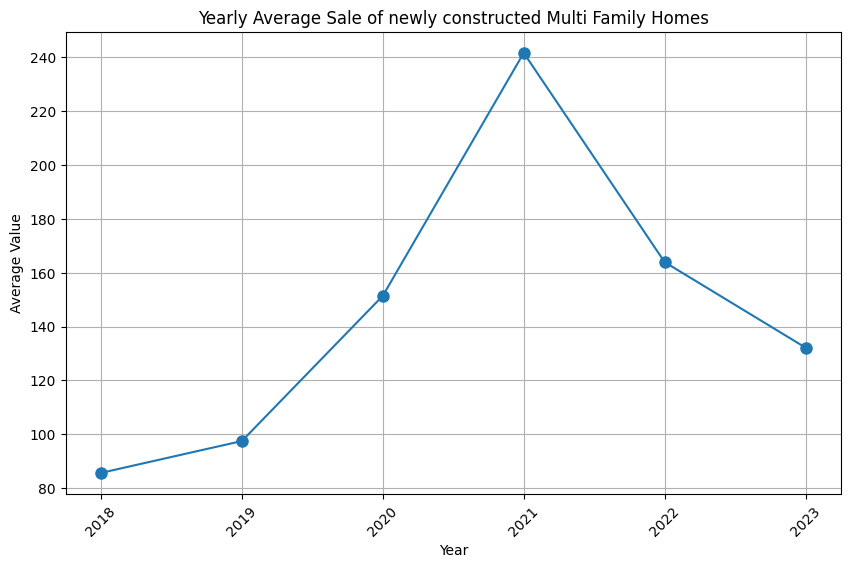

In [86]:
mfnc = pd.read_csv('New_Construction_Multi.csv')
mfnc = mfnc[(mfnc['RegionName'] == 'Boston, MA')]
mfnc = mfnc.filter(regex='^(201[0-9]|202[0-3])-')
years = [col.split('-')[0] for col in mfnc.columns[1:]]
years = sorted(set(years))

print(years)

yearly_avg_data = pd.DataFrame()

for year in years:
    year_columns = [col for col in mfnc.columns if col.startswith(year)]
    mean_values = []
    for i in range(0, len(year_columns), 12):
        chunk_mean = mfnc[year_columns[i:i+12]].mean(axis=1)
        mean_values.append(chunk_mean)
    
    yearly_avg_data[year] = np.concatenate(mean_values, axis=0)

print(yearly_avg_data.head())

plt.figure(figsize=(10, 6))
plt.plot(years, yearly_avg_data.values.flatten(), marker='o', markersize=8)
plt.title(f'Yearly Average Sale of newly constructed Multi Family Homes')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()